## 1.DecisionTree & RandomForest

这个博客的范例,scikit-learn决策树算法类库使用小结.
https://www.cnblogs.com/pinard/p/6056319.html


决策树原理
http://www.cnblogs.com/pinard/p/6050306.html


笔记：


ID3算法有四个主要的不足，一是不能处理连续特征，第二个就是用信息增益作为标准容易偏向于取值较多的特征，最后两个是缺失值处理的问和过拟合问题。昆兰在C4.5算法中改进了上述4个问题。

* 要注意的是，**与离散属性不同的是，如果当前节点为连续属性，则该属性后面还可以参与子节点的产生选择过程**。
* 信息增益率
* 
* 对于第4个问题，C4.5引入了正则化系数进行初步的剪枝。下篇讲CART的时候会详细讨论剪枝的思路。


1. 由于决策树算法非常容易过拟合，因此对于生成的决策树必须要进行剪枝。剪枝的算法有非常多，C4.5的剪枝方法有优化的空间。思路主要是两种，一种是预剪枝，即在生成决策树的时候就决定是否剪枝。另一个是后剪枝，即先生成决策树，再通过交叉验证来剪枝。后面在下篇讲CART树的时候我们会专门讲决策树的减枝思路，主要采用的是后剪枝加上交叉验证选择最合适的决策树。

2. C4.5生成的是多叉树，即一个父节点可以有多个节点。很多时候，在计算机中二叉树模型会比多叉树运算效率高。如果采用二叉树，可以提高效率。

3. C4.5只能用于分类，如果能将决策树用于回归的话可以扩大它的使用范围。

4. C4.5由于使用了熵模型，里面有大量的耗时的对数运算,如果是连续值还有大量的排序运算。如果能够加以模型简化可以减少运算强度但又不牺牲太多准确性的话，那就更好了。

 
这4个问题在CART树里面部分加以了改进。所以目前如果不考虑集成学习话，在普通的决策树算法里，CART算法算是比较优的算法了。scikit-learn的决策树使用的也是CART算法。在下篇里我们会重点聊下CART算法的主要改进思路，上篇就到这里。


#### CART
CART分类树算法就是使用的基尼系数来选择决策树的特征。同时，为了进一步简化，CART分类树算法每次仅仅对某个特征的值进行二分，而不是多分，这样CART分类树算法建立起来的是二叉树，而不是多叉树。这样一可以进一步简化基尼系数的计算，二可以建立一个更加优雅的二叉树模型。

特别的，对于样本D,如果根据特征A的某个值a,把D分成D1和D2两部分，则在特征A的条件下，D的基尼系数表达式为 Gini(D,A) = D1/D *Gini(D1) + D2/D *Gini(D2)

基尼系数代表了模型的不纯度，基尼系数越小，则不纯度越低，特征越好。这和信息增益(比)是相反的。二次函数运算非常简单，在二分类的时候更加简单。

对于CART分类树离散值的处理问题，采用的思路是不停的二分离散特征。由于这次没有把特征A的取值完全分开，**后面我们还有机会在子节点继续选择到特征A来划分A1和A3。这和ID3或者C4.5不同**，在ID3或者C4.5的一棵子树中，离散特征只会参与一次节点的建立。

对于CART分类树连续值的处理问题，其思想和C4.5是相同的。要注意的是，与离散属性不同的是，**如果当前节点为连续属性，则该属性后面还可以参与子节点的产生选择过程**。



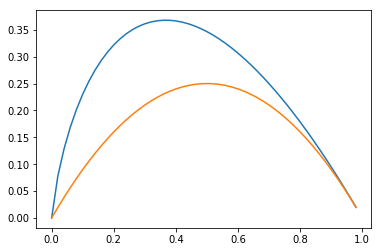

In [151]:
# 什么是 '熵之半' 曲线 ?
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.000000001,1,0.02)
y1 = -x*np.log(x)
y2 = x*(1-x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [5]:
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os

In [30]:
os.environ["PATH"] += os.pathsep + 'd:/software/Graphviz2.38/bin/'

In [6]:
iris = load_iris()

In [8]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [14]:
iris.data.shape

(150, 4)

In [15]:
clf = tree.DecisionTreeClassifier()

In [18]:
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
with open('iris.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [32]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')

True

In [59]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True
                               )

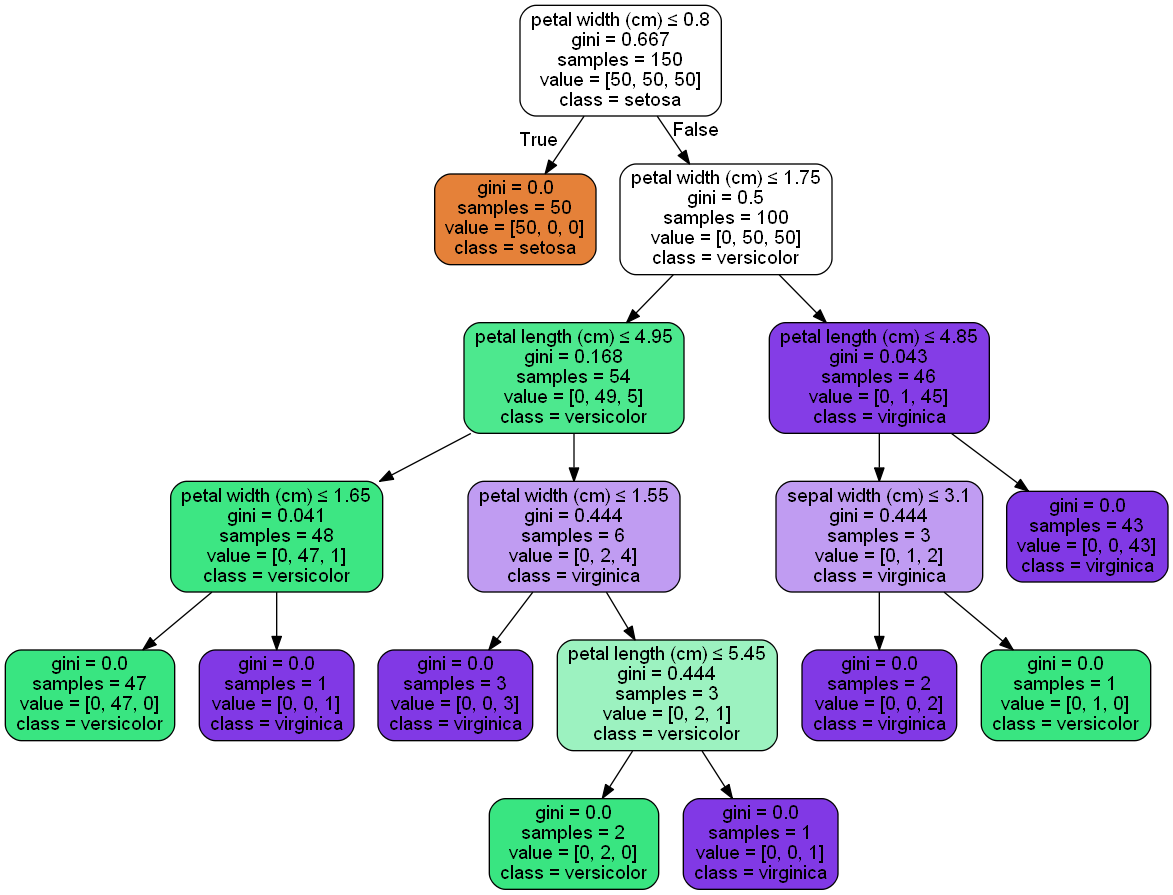

In [62]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [66]:
# 一个限制层数为4的DecisionTreeClassifier范例
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree

In [72]:
iris = datasets.load_iris()
x = iris.data[:, [0,2]]
y = iris.target

In [77]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [227]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [93]:
z = z.reshape(xx.shape)

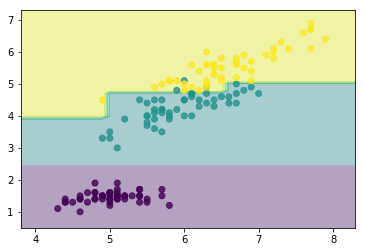

In [104]:
plt.contourf(xx, yy, z, alpha=0.4)
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.8)
plt.show()

In [128]:
from IPython.display import Image
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=iris.feature_names[0:3:2],
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True)

In [127]:
iris.feature_names[0:3:2]

['sepal length (cm)', 'petal length (cm)']

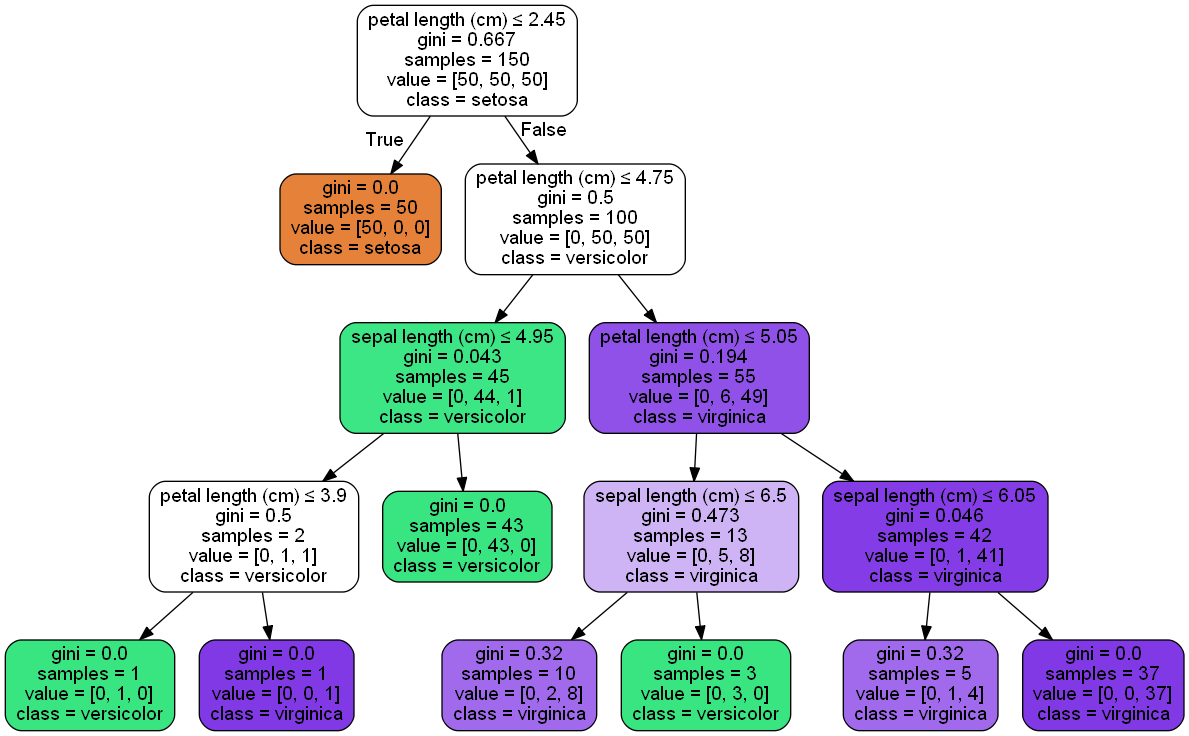

In [130]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 小象学院课程

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pydotplus

In [152]:
from sklearn.datasets import load_iris

In [154]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [156]:
iris.data.shape

(150, 4)

In [161]:
iris.data[list(range(4))]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2]])

In [171]:
x = iris.data[:, :2]
y = iris.target

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [180]:
x_test.shape

(45, 2)

In [358]:
clf_xiaoxiang1 = tree.DecisionTreeClassifier(criterion='entropy')
clf_xiaoxiang1
# min_samples_split = 10：如果该结点包含的样本数目大于10，则(有可能)对其分支
# min_samples_leaf = 10：若将某结点分支后，得到的每个子结点样本数目都大于10，
# 则完成分支；否则，不进行分支

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
clf_xiaoxiang1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [189]:
y_test_prime = clf_xiaoxiang1.predict(x_test)

In [194]:
(y_test_prime == y_test).mean()

0.64444444444444449

In [195]:
accuracy_score(y_test_prime, y_test)

0.64444444444444449

In [263]:
with open('iris.dot', 'w') as f:
    tree.export_graphviz(clf_xiaoxiang1, out_file=f)

In [264]:
dot_data = tree.export_graphviz(clf_xiaoxiang1, out_file=None,
                               feature_names=iris.feature_names[:2],
                               class_names=iris.target_names,
                               filled=True, rounded=True)

In [265]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [266]:
graph.write_pdf('iris.pdf')

True

In [267]:
with open('iris.png', 'wb') as f:
    f.write(graph.create_png())

In [277]:
x_min, x_max = x_train[:,0].min() -0.5, x_train[:,0].max() + 0.5
y_min, y_max = x_train[:,1].min() - 0.5, x_train[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.02),np.arange(y_min, y_max, 0.2)) 

In [314]:
z = clf_xiaoxiang1.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

In [324]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

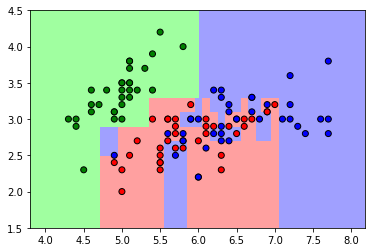

In [328]:
# plt.contourf(xx, yy, z, alpha=0.4, cmap=cm_light)
plt.pcolormesh(xx, yy, z, cmap=cm_light)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_dark, edgecolor='k')
plt.show()

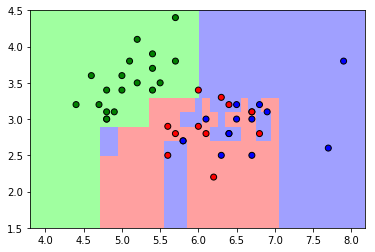

In [329]:
# plt.contourf(xx, yy, z, alpha=0.4, cmap=cm_light)
plt.pcolormesh(xx, yy, z, cmap=cm_light)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_dark, edgecolor='k')
plt.show()

In [331]:
depth = np.arange(1,15)
err_list = []
for d in depth:
    clf_xiaoxiang = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf_xiaoxiang.fit(x_train, y_train)
    y_test_prime = clf_xiaoxiang.predict(x_test)
    err = 1 - (y_test==y_test_prime).mean()
    err_list.append(err)
    print('错误率：%.2f%%' % (100*err))

错误率：33.33%
错误率：28.89%
错误率：33.33%
错误率：20.00%
错误率：24.44%
错误率：24.44%
错误率：24.44%
错误率：28.89%
错误率：31.11%
错误率：31.11%
错误率：37.78%
错误率：37.78%
错误率：35.56%
错误率：35.56%


In [354]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

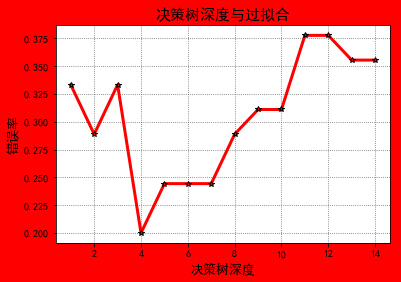

In [430]:
plt.figure(facecolor='r')
plt.plot(depth, err_list, 'r*-', markeredgecolor='k', lw=3)
plt.xlabel('决策树深度', fontsize=13)
plt.ylabel('错误率', fontsize=13)
plt.title('决策树深度与过拟合', fontsize=15)
plt.grid(b=True, ls=':', color='#606060')
plt.show()


In [376]:
x_prime = iris.data
y = iris.target

In [379]:
x_prime_train, x_prime_test, y_train, y_test = train_test_split(x_prime, y, test_size=0.3, random_state=42)

In [380]:
feature_pairs = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

特征 sepal length (cm) + sepal width (cm)
训练集准确率：84.76%
测试集准确率：64.44%
特征 sepal length (cm) + petal length (cm)
训练集准确率：95.24%
测试集准确率：93.33%
特征 sepal length (cm) + petal width (cm)
训练集准确率：95.24%
测试集准确率：93.33%
特征 sepal width (cm) + petal length (cm)
训练集准确率：95.24%
测试集准确率：91.11%
特征 sepal width (cm) + petal width (cm)
训练集准确率：96.19%
测试集准确率：97.78%
特征 petal length (cm) + petal width (cm)
训练集准确率：96.19%
测试集准确率：100.00%


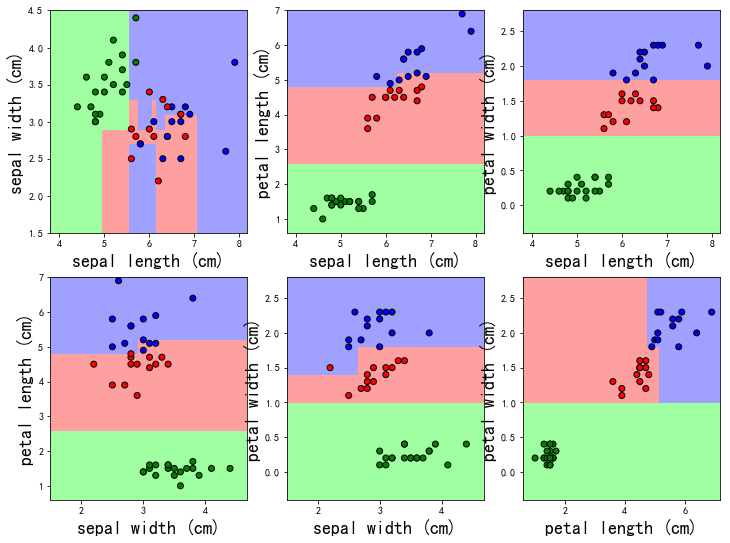

In [439]:
plt.figure(figsize=(12, 9), facecolor='w')
for i, pair in enumerate(feature_pairs):
    x_train = x_prime_train[:,pair]
    x_test = x_prime_test[:,pair]
    clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
    clf.fit(x_train, y_train)
    acc_train = (clf.predict(x_train)==y_train).mean()
    acc_test = (clf.predict(x_test)==y_test).mean()
    print('特征', iris.feature_names[pair[0]], '+', iris.feature_names[pair[1]])
    print('训练集准确率：%.2f%%' % (100*acc_train))
    print('测试集准确率：%.2f%%' % (100*acc_test))
    x_min, x_max = x_train[:,0].min() -0.5, x_train[:,0].max() + 0.5
    y_min, y_max = x_train[:,1].min() - 0.5, x_train[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.02),np.arange(y_min, y_max, 0.2))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(xx, yy, z, cmap=cm_light)
    plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_dark, edgecolor='k')
    plt.xlabel(iris.feature_names[pair[0]], fontsize=18)
    plt.ylabel(iris.feature_names[pair[1]], fontsize=18)
#     plt.show()
plt.show()

In [437]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [438]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 决策树回归

In [587]:
x = np.random.rand(100) * 6 - 3
x.sort()
y = np.sin(x) + np.random.randn(100) * 0.1
x = x.reshape(-1, 1)

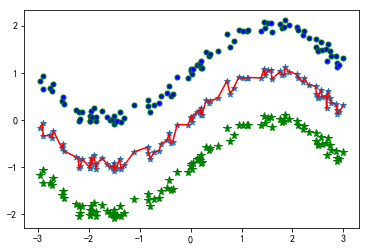

In [606]:
plt.scatter(x, y, marker='*')
plt.plot(x, y, 'r-', markersize=10, markeredgecolor='g')
plt.plot(x, y+1, 'bo', markersize=5, markeredgecolor='g')
plt.plot(x, y-1, 'g*', markersize=8, markeredgecolor='g')
plt.show()

In [520]:
dt = tree.DecisionTreeRegressor(criterion='mse', max_depth=5)
dt.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [535]:
x_test = np.linspace(-3, 3, 50).reshape(-1,1)
y_prime = dt.predict(x_test)

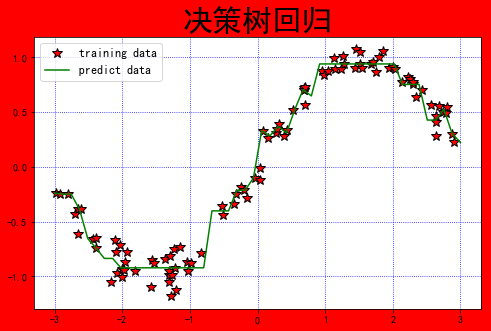

In [564]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,5), facecolor='r')
plt.plot(x, y, 'r*', markersize=10, markeredgecolor='k', label='training data')
plt.plot(x_test, y_prime, 'g-', markersize=10, markeredgecolor='k', label='predict data')
plt.legend(loc='upper left', fontsize=12)
plt.grid(b=True, ls=':', color='b')
plt.title('决策树回归', fontsize=30)
plt.show()

In [657]:
depth = [2,4, 6, 8, 10]
color = 'rgbmy'
dtr = tree.DecisionTreeRegressor(criterion='mse')
plt.figure(figsize=(9,5), facecolor='w')

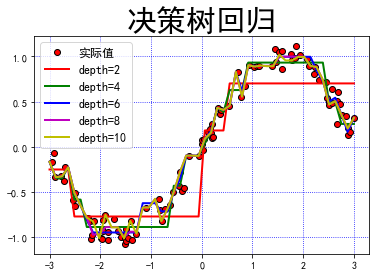

In [668]:
plt.plot(x, y, 'ro', mec='k', label='实际值')
for d, c in zip(depth, color):
#     print(d, c)
    dtr.set_params(max_depth = d)
    dtr.fit(x, y)
    y_prime = dtr.predict(x_test)
    plt.plot(x_test, y_prime, '-', color=c, lw=2, mec='k', label='depth=%d' % d)
plt.legend(loc='upper left', fontsize=12)
plt.grid(b=True, ls=':', color='b')
plt.title('决策树回归', fontsize=30)
plt.show()

In [659]:
list(zip(depth, color))

[(2, 'r'), (4, 'g'), (6, 'b'), (8, 'm'), (10, 'y')]

In [661]:
list(enumerate('sfck'))

[(0, 's'), (1, 'f'), (2, 'c'), (3, 'k')]

### 多输出